<a href="https://colab.research.google.com/github/anchalvishawakarma/Projects/blob/main/Concrete_Strength_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Concrete Comprehensive Strength 

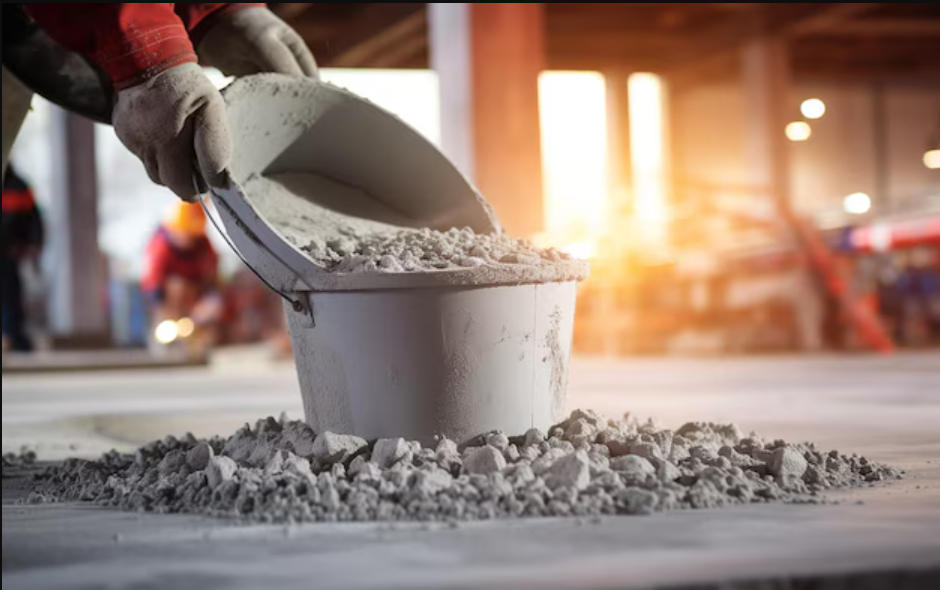

In [1]:
# Import data Manipulation Libraries
import pandas as pd
import numpy as np
# Import Data Visualization Library
import matplotlib.pyplot as plt
import seaborn as sns
# Import Filter Warning Library
import warnings
warnings.filterwarnings('ignore')
# import Scikit Learn Library
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

# Customise Descriptive Stats
from collections import OrderedDict

In [2]:
# Import Dataset using padas function
df=pd.read_csv('Concrete Compressive Strength.csv')
df.sample(5)     #Rdom

,Cement,Blast_Furnace_Slag,Fly Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age_(day),Concrete_compressive_strength
374,376.00,0.0,0.00,214.60,0.00,1003.5,762.36,3,16.278528
24,380.00,0.0,0.00,228.00,0.00,932.0,670.00,365,52.516697
609,236.00,0.0,0.00,193.00,0.00,968.0,885.00,180,24.104081
272,231.75,0.0,121.62,173.96,6.72,1056.4,778.45,56,42.699249
286,181.38,0.0,167.01,169.59,7.56,1055.6,777.80,28,27.772093


Rows  = 1030 <br>
Columns  = 9 <br>
Categorical = 0 <br>
Numericals = 9 <br>
Objective = Predict Compresive Strength of Cement Composit Mixture. <br>

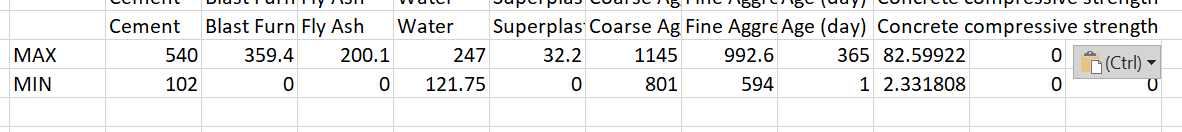

In [3]:
# Understand the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Cement                         1030 non-null   float64
 1   Blast_Furnace_Slag             1030 non-null   float64
 2   Fly Ash                        1030 non-null   float64
 3   Water                          1030 non-null   float64
 4   Superplasticizer               1030 non-null   float64
 5   Coarse_Aggregate               1030 non-null   float64
 6   Fine_Aggregate                 1030 non-null   float64
 7   Age_(day)                      1030 non-null   int64  
 8   Concrete_compressive_strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


In [4]:
# Descriptive Statistics
df.describe()

,Cement,Blast_Furnace_Slag,Fly Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age_(day),Concrete_compressive_strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


In [5]:
stats =[]
for i in df.columns:
  numerical_stats = OrderedDict({
      'Feature':i,
      'Max':df[i].max(),
      'Min':df[i].min(),
      'Mean':df[i].mean(),
      'Median':df[i].median(),
      'Std':df[i].std(),
      'Variance':df[i].var(),
      'Skewness':df[i].skew(),
      'Kurtosis':df[i].kurt(),
      '25%':df[i].quantile(0.25),
      '75%':df[i].quantile(0.75),
      'IRO':df[i].quantile(0.75)-df[i].quantile(0.25)
})
  stats.append(numerical_stats)
report=pd.DataFrame(stats)
report.T

,0,1,2,3,4,5,6,7,8
Feature,Cement,Blast_Furnace_Slag,Fly Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age_(day),Concrete_compressive_strength
Max,540.0,359.4,200.1,247.0,32.2,1145.0,992.6,365.0,82.599225
Min,102.0,0.0,0.0,121.75,0.0,801.0,594.0,1.0,2.331808
Mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
Median,272.9,22.0,0.0,185.0,6.35,968.0,779.51,28.0,34.442774
Std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
Variance,10921.742654,7444.083725,4095.548093,456.060245,35.682602,6045.656228,6428.099159,3990.437729,279.079717
Skewness,0.509517,0.800737,0.537445,0.074324,0.908113,-0.040206,-0.252979,3.269177,0.416922
Kurtosis,-0.520663,-0.508139,-1.328505,0.122676,1.413186,-0.599001,-0.102165,12.168989,-0.313844
25%,192.375,0.0,0.0,164.9,0.0,932.0,730.95,7.0,23.707115


<function matplotlib.pyplot.show(close=None, block=None)>

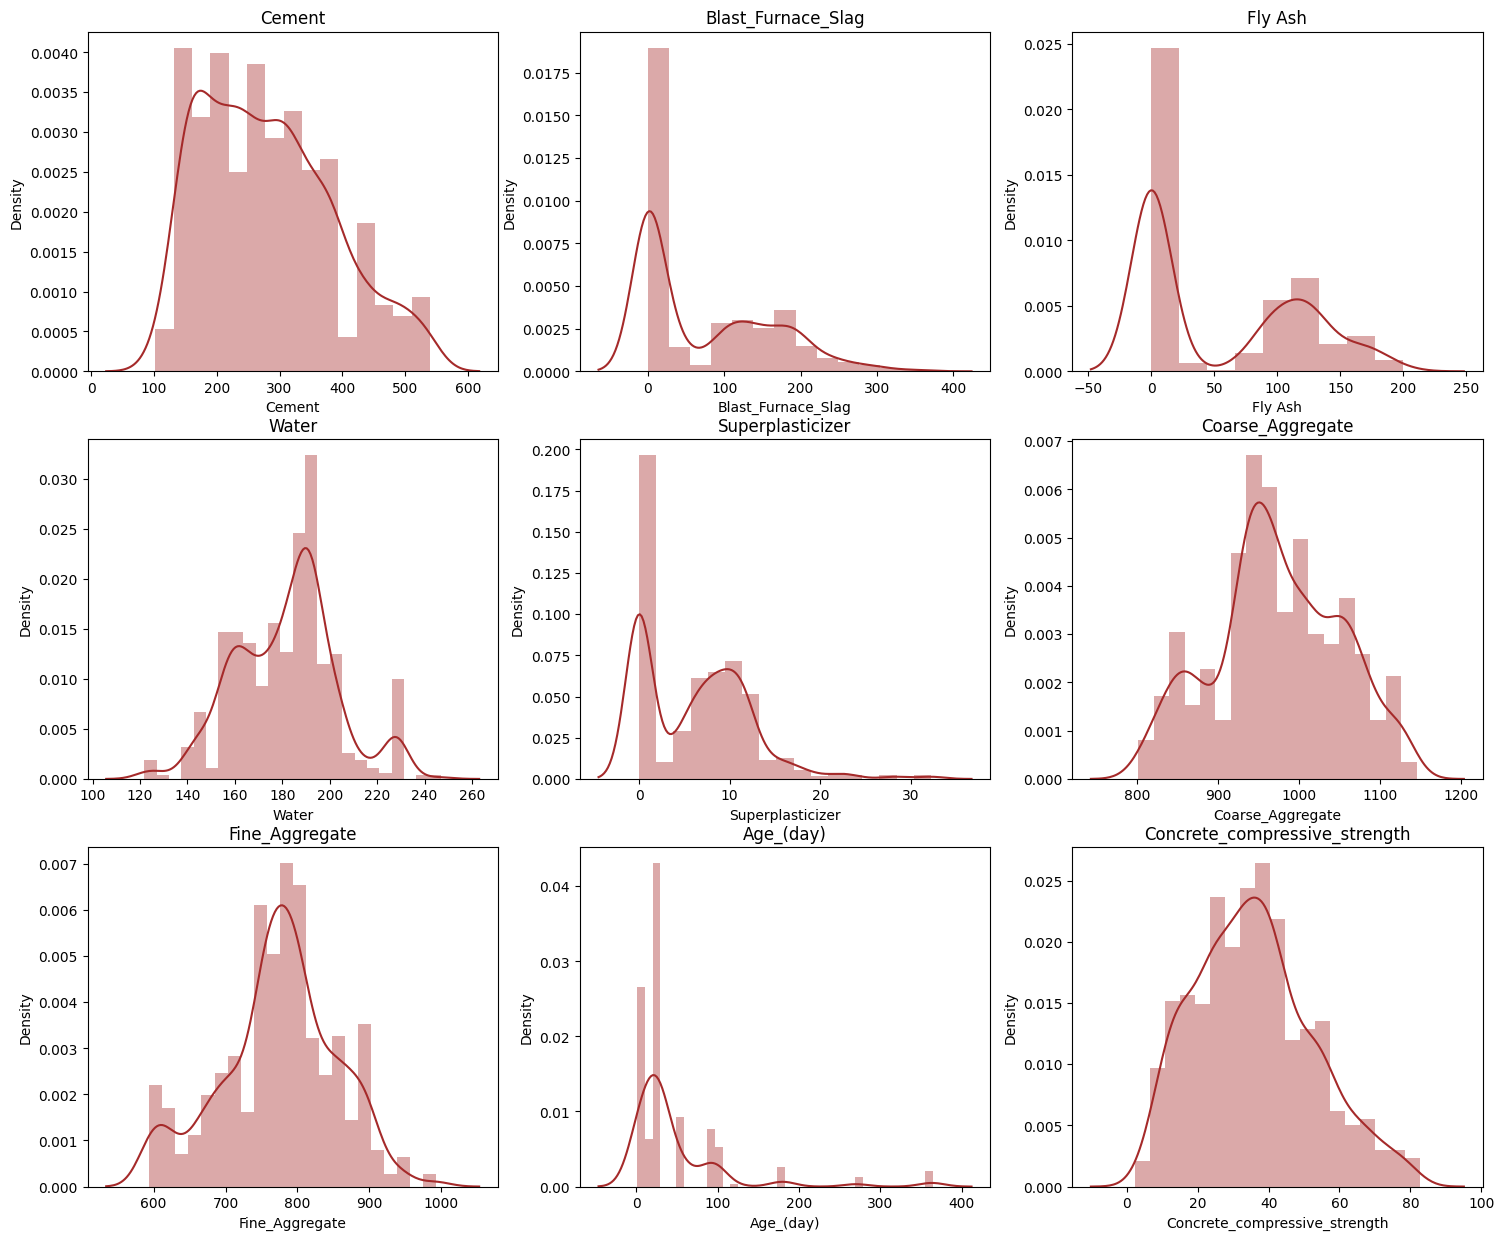

In [6]:
plt.figure(figsize=(18,15))
plot=0
for i in df.columns:
  plot+=1
  plt.subplot(3,3,plot)
  sns.distplot(df[i],color='brown')
  plt.title(i)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

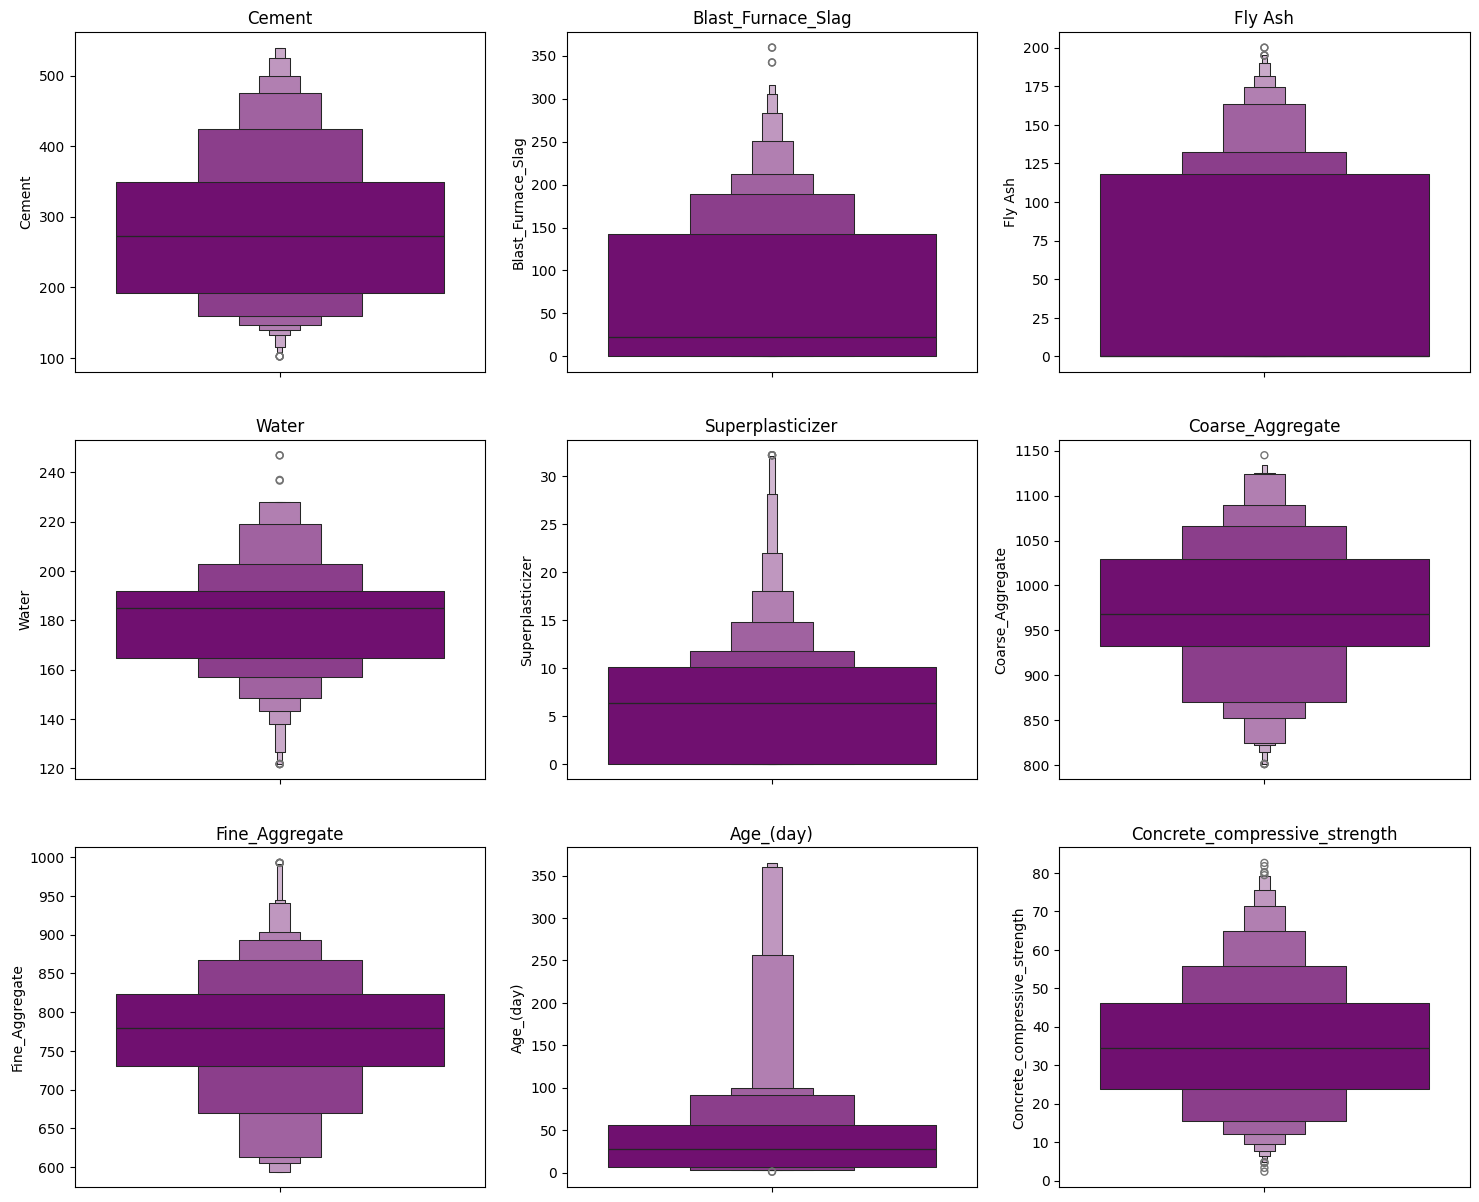

In [7]:
plt.figure(figsize=(18,15))
plot=0
for i in df.columns:
  plot+=1
  plt.subplot(3,3,plot)
  sns.boxenplot(df[i],color='purple')
  plt.title(i)
plt.show

In [8]:
# Checkinf Colimns Names
df.columns

Index(['Cement', 'Blast_Furnace_Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse_Aggregate', 'Fine_Aggregate', 'Age_(day)',
       'Concrete_compressive_strength'],
      dtype='object')

## Split the Dataset into Train and Test

In [9]:

X= df.drop('Concrete_compressive_strength',axis=1)
X.head()

,Cement,Blast_Furnace_Slag,Fly Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age_(day)
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360


In [10]:
Y=df['Concrete_compressive_strength']
Y.head()

0    79.986111
1    61.887366
2    40.269535
3    41.052780
4    44.296075
Name: Concrete_compressive_strength, dtype: float64

Spliting Data 


In [11]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=21)

In [12]:
# Scalling Technique
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [13]:
X_train.min()

np.float64(0.0)

In [14]:
X_train.max()

np.float64(1.0000000000000002)

### Model Performance

In [15]:

models = {'RandomForestRegressor':RandomForestRegressor()}

def evaluate(models,X_train,X_test,y_train,y_test):
    np.random.seed(42)
    # Creating One Dictionary to Save Model Score
    model_score = {}
    for name,model in models.items():
        model.fit(X_train, y_train)
        model_score[name] = model.score(X_test,y_test)
    return model_score

In [16]:
model_score = evaluate(models = models ,X_train = X_train,X_test = X_test,y_train = y_train,y_test = y_test)
model_score

{'RandomForestRegressor': 0.901351223486552}

In [17]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30]
}
grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)


Best parameters: {'max_depth': 20, 'n_estimators': 50}
Best score: 0.8891917939784308


In [18]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

for name, model in models.items():
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    print(f"{name}: MSE = {mse}, MAE = {mae}")


RandomForestRegressor: MSE = 29.829292051836717, MAE = 3.700758584327359


#### Predictions vs. Actual

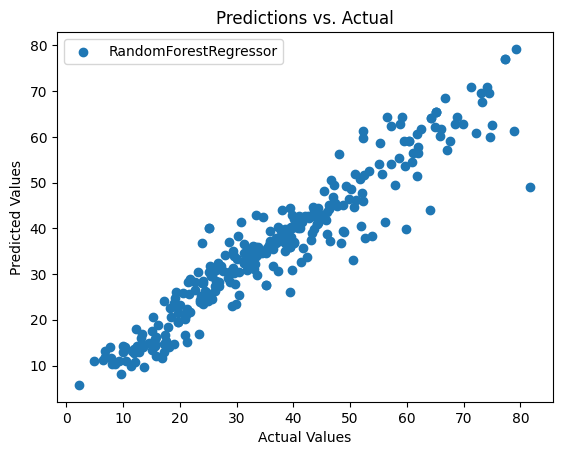

In [19]:

for name, model in models.items():
    y_pred = model.predict(X_test)
    plt.scatter(y_test, y_pred, label=name)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.title('Predictions vs. Actual')
plt.show()


#### Conclusion

- Random Forest Regressor achieved an R² score of **0.90** on the test set.
- AdaBoost Regressor and Gradient Boosting Regressor also performed well but had slightly lower scores.

# Model Deployment

### Using Stremlit


In [20]:
! pip install streamlit


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python3 -m pip install --upgrade pip


In [21]:
import pickle

# Assuming 'model' is your trained ML model
with open("model.pkl", "wb") as f:
    pickle.dump(model, f)


2025-02-02 05:35:31.791 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-02 05:35:32.201 
  command:

    streamlit run /home/codespace/.local/lib/python3.12/site-packages/ipykernel_launcher.py [ARGUMENTS]
2025-02-02 05:35:32.202 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-02 05:35:32.203 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-02 05:35:32.204 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-02 05:35:32.207 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-02 05:35:32.208 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-02 05:35:32.210 Thread 'MainTh